# 데이터 시각화

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm

fontpath = 'C:\Windows\Fonts\gulim.ttc'   
font = fm.FontProperties(fname=fontpath).get_name()    
matplotlib.rc("font", family = font)

<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:8: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Playdata\AppData\Local\Temp\ipykernel_10564\3922697014.py:8: SyntaxWarning: invalid escape sequence '\W'
  fontpath = 'C:\Windows\Fonts\gulim.ttc'    # 폰트경로


In [4]:
df = pd.read_csv('./data/preprocessing_Data.csv')

-----

# 1) 특성별 음주 습관 (음주량에 영향을 미치는 요인) 

##### 외출시 음주량에 따른 비율

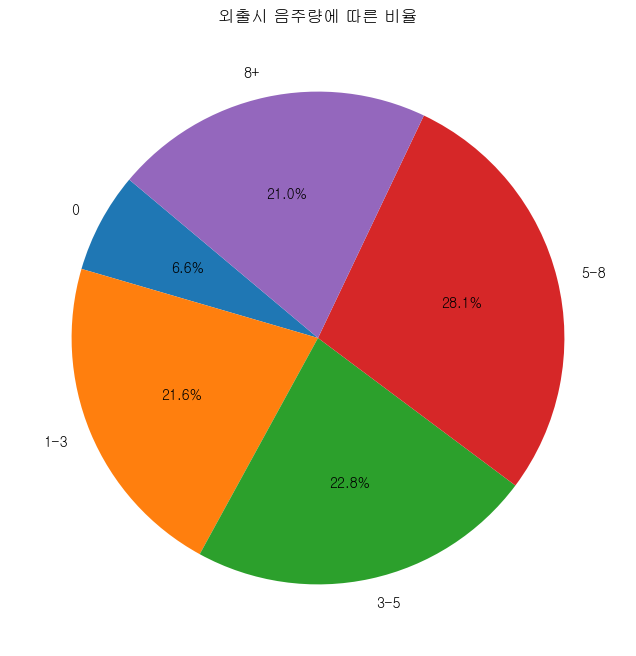

In [37]:
# 외출시 음주량 100퍼센트 기준 비율
drinking_out_count = df['외출시음주량'].value_counts(normalize=True) * 100

drinking_out_count

#파이형 그래프로 시각화

drink_order = ['0', '1-3', '3-5', '5-8', '8+']
ordered_drinking_out_count = drinking_out_count.reindex(drink_order)


plt.figure(figsize=(8, 8))
plt.pie(ordered_drinking_out_count, labels=ordered_drinking_out_count.index, autopct='%1.1f%%', startangle=140)
plt.title('외출시 음주량에 따른 비율')
plt.show()

##### 성별별 외출시 음주량
남성의 음주량이 더 많은 것으로 나타났다.


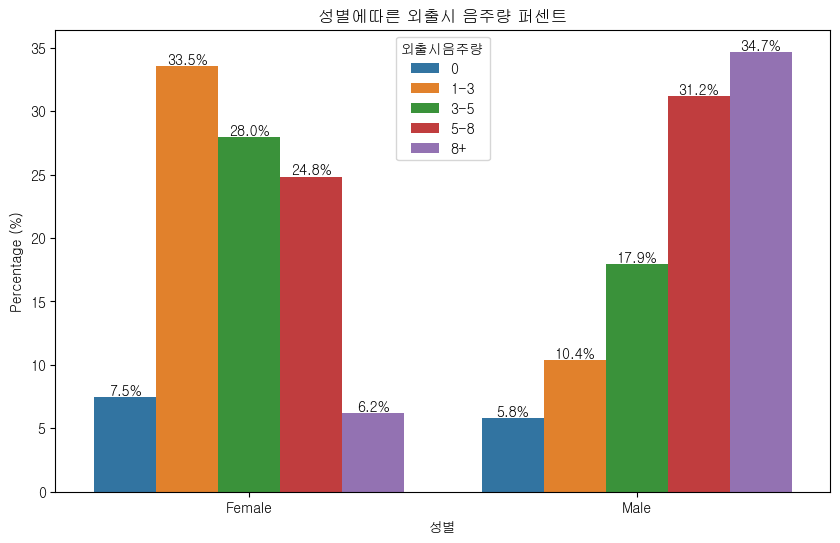

In [38]:

gender_drink_count = df.groupby(['성별', '외출시음주량']).size().reset_index(name='count')
gender_total_count = df['성별'].value_counts()


gender_drink_count['percentage'] = gender_drink_count.apply(
    lambda row: (row['count'] / gender_total_count[row['성별']]) * 100, axis=1
)


plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x='성별', 
    y='percentage', 
    hue='외출시음주량', 
    hue_order=drink_order, 
    data=gender_drink_count
)


for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.title('성별에따른 외출시 음주량 퍼센트')
plt.ylabel('Percentage (%)')
plt.xlabel('성별')
plt.legend(title='외출시음주량')
plt.show()




##### 파티활동빈도별 외출 시 음주량 비율
파티활동빈도가 높을수록, 외출 시 음주량도 증가하는 것으로 나타났다.



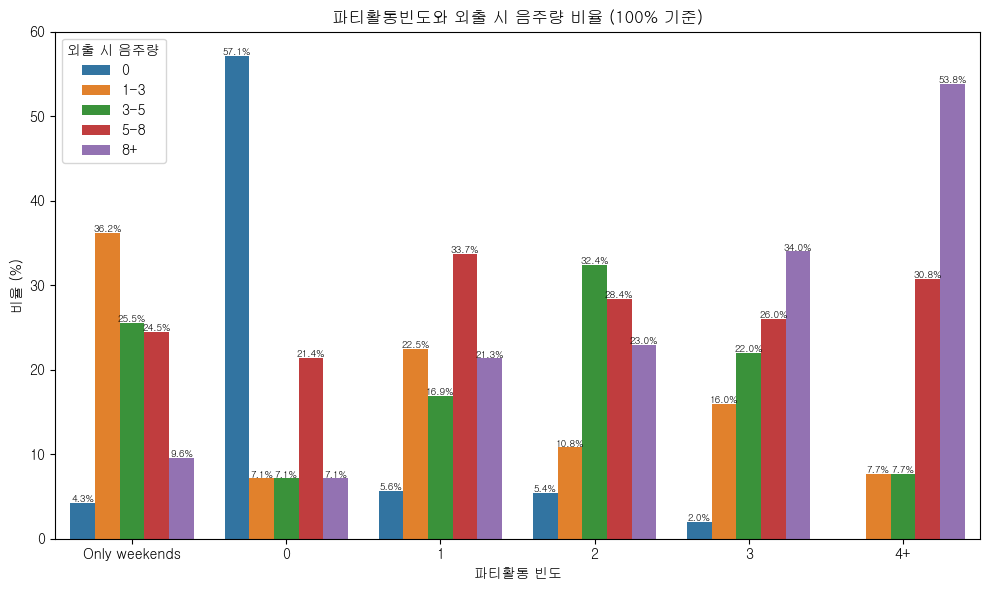

In [39]:

party_drink_counts = df.groupby(['파티활동빈도', '외출시음주량']).size().reset_index(name='count')


total_party_counts = party_drink_counts.groupby('파티활동빈도')['count'].sum().reset_index(name='total')

party_drink_counts = party_drink_counts.merge(total_party_counts, on='파티활동빈도')
party_drink_counts['percentage'] = (party_drink_counts['count'] / party_drink_counts['total']) * 100


drink_order = ['0', '1-3', '3-5', '5-8', '8+']
weekend_order = ['Only weekends', '0', '1', '2', '3', '4+']


plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=party_drink_counts,
    x='파티활동빈도',
    y='percentage',
    hue='외출시음주량',
    order=weekend_order,
    hue_order=drink_order
)

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=7)

plt.title("파티활동빈도와 외출 시 음주량 비율 (100% 기준)")
plt.xlabel("파티활동 빈도")
plt.ylabel("비율 (%)")
plt.legend(title='외출 시 음주량')
plt.tight_layout()
plt.show()


##### 용돈수준별 외출시음주량 비율
용돈 수준이 높아질수록, 외출 시 음주량이 증가하는 것으로 나타났다.


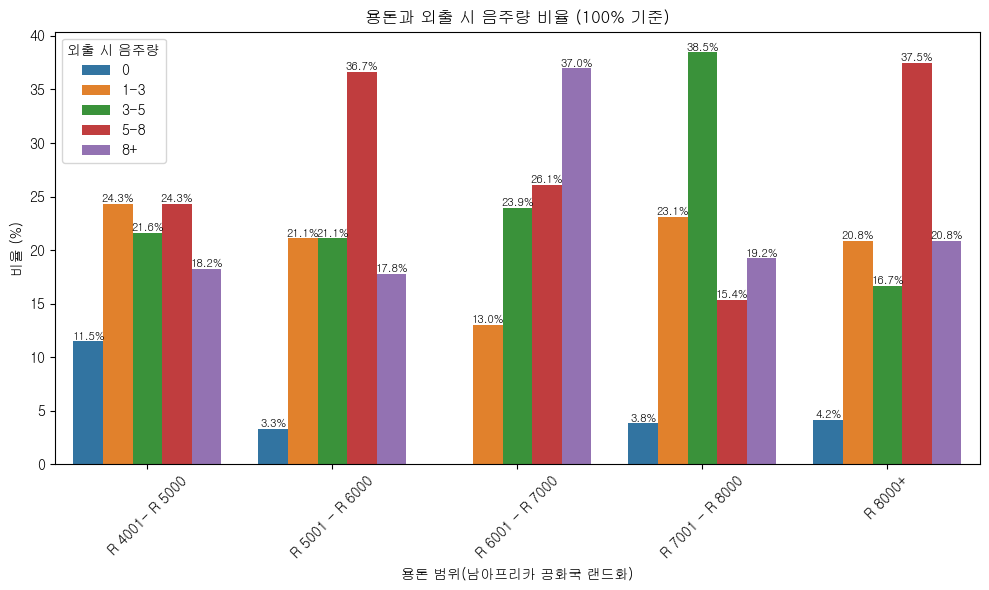

In [40]:

allowance_drink_counts = df.groupby(['용돈', '외출시음주량']).size().reset_index(name='count')


total_allowance_counts = allowance_drink_counts.groupby('용돈')['count'].sum().reset_index(name='total')


allowance_drink_counts = allowance_drink_counts.merge(total_allowance_counts, on='용돈')
allowance_drink_counts['percentage'] = (allowance_drink_counts['count'] / allowance_drink_counts['total']) * 100


money_order = ['R 4001- R 5000', 'R 5001 - R 6000', 'R 6001 - R 7000', 'R 7001 - R 8000', 'R 8000+']
drink_order = ['0', '1-3', '3-5', '5-8', '8+']


plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=allowance_drink_counts,
    x='용돈',
    y='percentage',
    hue='외출시음주량',
    order=money_order,
    hue_order=drink_order
)


for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=8)

plt.xticks(rotation=45)
plt.title("용돈과 외출 시 음주량 비율 (100% 기준)")
plt.xlabel("용돈 범위(남아프리카 공화국 랜드화)")
plt.ylabel("비율 (%)")
plt.legend(title='외출 시 음주량')
plt.tight_layout()
plt.show()


##### 용돈수준별 파티활동빈도 비율
용돈 수준이 높아질수록, 파티활동빈도가 높아지는 것으로 나타났다.

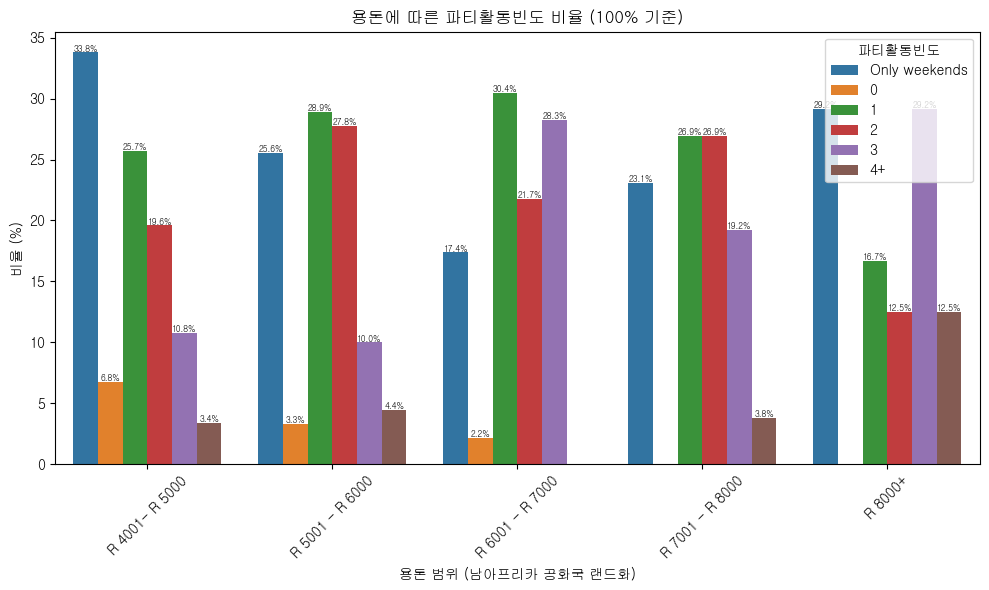

In [41]:

money_order = ['R 4001- R 5000', 'R 5001 - R 6000', 'R 6001 - R 7000', 'R 7001 - R 8000', 'R 8000+']
weekend_order = ['Only weekends', '0', '1', '2', '3', '4+']


count_data = df.groupby(['용돈', '파티활동빈도']).size().reset_index(name='count')
total_counts = count_data.groupby('용돈')['count'].sum().reset_index(name='total')
count_data = count_data.merge(total_counts, on='용돈')
count_data['percentage'] = (count_data['count'] / count_data['total']) * 100


plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=count_data, 
    x='용돈', 
    y='percentage', 
    hue='파티활동빈도', 
    hue_order=weekend_order, 
    order=money_order
)


for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=6)

plt.xticks(rotation=45)
plt.title("용돈에 따른 파티활동빈도 비율 (100% 기준)")
plt.xlabel("용돈 범위 (남아프리카 공화국 랜드화)")
plt.ylabel("비율 (%)")
plt.legend(title='파티활동빈도')
plt.tight_layout()
plt.show()

---

# 2) 성적에 영향을 미치는 요인 




##### **부모의 음주 허용 여부별 최근 성적 평균**
- **부모의 음주 허용 여부에 따른 부모 관계 친밀도**

    부모가 음주를 허용한 경우, 그렇지 않은 경우보다 최근 성적의 평균이 더 높은 것으로 나타났다.  
    부모의 음주 허용 여부에 따른 부모 관계 친밀도를 확인해본 결과, 부모님이 음주를 허용한다고 응답했을수록 부모와의 관계도 친밀한 것으로 나타났다.  
    부모와의 관계 친밀도가 최근 성적에 영향을 미쳤을 가능성이 있는 것처럼 보인다.




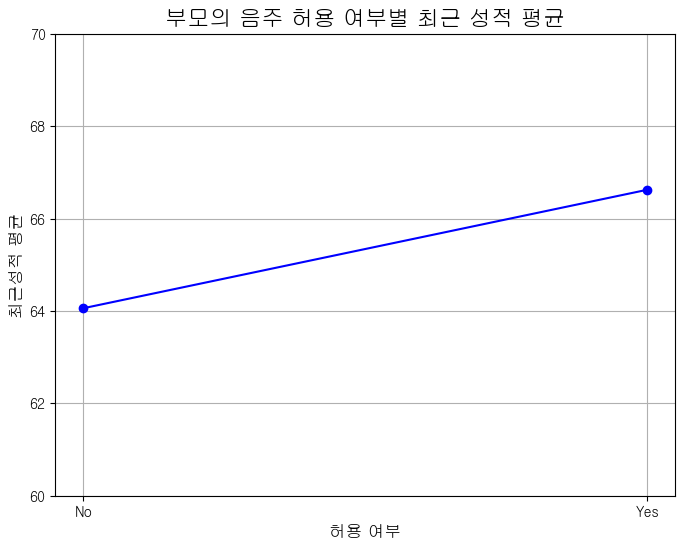

In [19]:
# 음주허용 
line_data = df.groupby('부모의음주허용여부')['최근성적'].mean()

plt.figure(figsize=(8, 6))
plt.plot(line_data.index, line_data.values, marker='o', linestyle='-', color='blue')
plt.ylim(60, 70)
plt.title('부모의 음주 허용 여부별 최근 성적 평균', fontsize=16)
plt.xlabel('허용 여부', fontsize=12)
plt.ylabel('최근성적 평균', fontsize=12)
plt.grid(True)
plt.show()

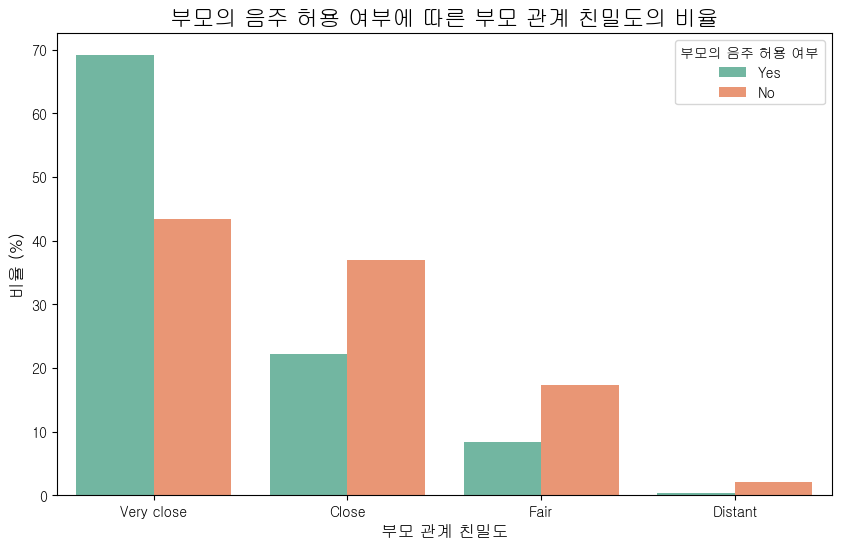

In [20]:
# 부모의 음주 허용 여부와 부모 관계 친밀도에 대한 카운트 계산
count_data = df.groupby(['부모의음주허용여부', '부모관계친밀도']).size().reset_index(name='count')
total_count = df.groupby('부모의음주허용여부')['부모관계친밀도'].count().reset_index(name='total_count')

# 비율 계산: 각 그룹 내에서 부모 관계 친밀도의 비율 계산
count_data = count_data.merge(total_count, on='부모의음주허용여부')
count_data['비율'] = (count_data['count'] / count_data['total_count']) * 100 
relationship_order = ['Very close', 'Close', 'Fair', 'Distant' ]  
count_data['부모관계친밀도'] = pd.Categorical(count_data['부모관계친밀도'], categories=relationship_order, ordered=True)

plt.figure(figsize=(10, 6))
answer = ['Yes', 'No']
sns.barplot(data=count_data, x='부모관계친밀도', y='비율', hue='부모의음주허용여부', hue_order=answer, palette='Set2')
plt.title('부모의 음주 허용 여부에 따른 부모 관계 친밀도의 비율', fontsize=16)
plt.xlabel('부모 관계 친밀도', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.legend(title='부모의 음주 허용 여부')
plt.show()


##### 학습 시간별 최근 성적의 평균
3~5 시간 공부한다고 응답한 학생들의 최근성적평균이 가장 낮은 결과를 보인다.  
또한 0시간 공부한다고 응답한 학생들의 최근성적평균이 가장 높은 것으로 보아 학습시간과 최근성적이 서로 큰 연관이 없을 가능성이 있다.



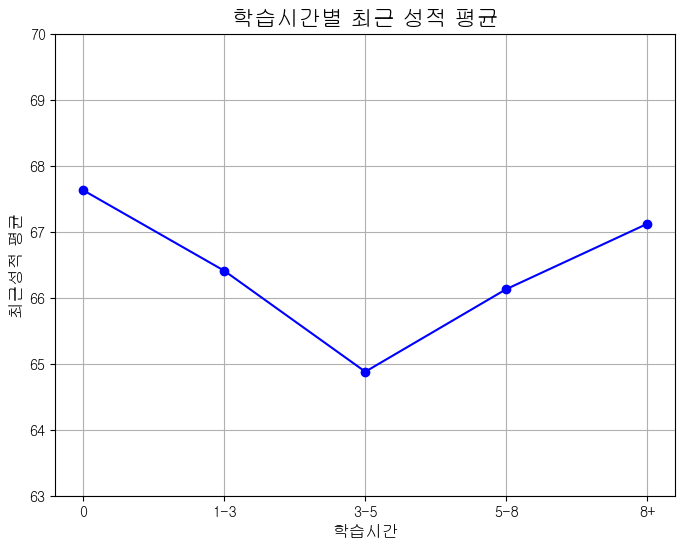

In [21]:
# 학습 시간별 
line_data = df.groupby('학습시간')['최근성적'].mean()

plt.figure(figsize=(8, 6))
plt.plot(line_data.index, line_data.values, marker='o', linestyle='-', color='blue')
plt.ylim(63, 70)
plt.title('학습시간별 최근 성적 평균', fontsize=16)
plt.xlabel('학습시간', fontsize=12)
plt.ylabel('최근성적 평균', fontsize=12)
plt.grid(True)
plt.show()



##### 파티활동빈도별 최근 성적 평균
일주일에 파티, 사교 활동에 4회 이상 참여한다고 응답한 학생들의 최근 성적 평균이 가장 낮은 것으로 나타났다.  
하지만 3회라고 응답한 학생들의 성적이 가장 높은 것으로 보아, 파티, 사교 활동이 성적에 직접적인 영향을 주지는 않을 가능성이 있는 것을 보인다.

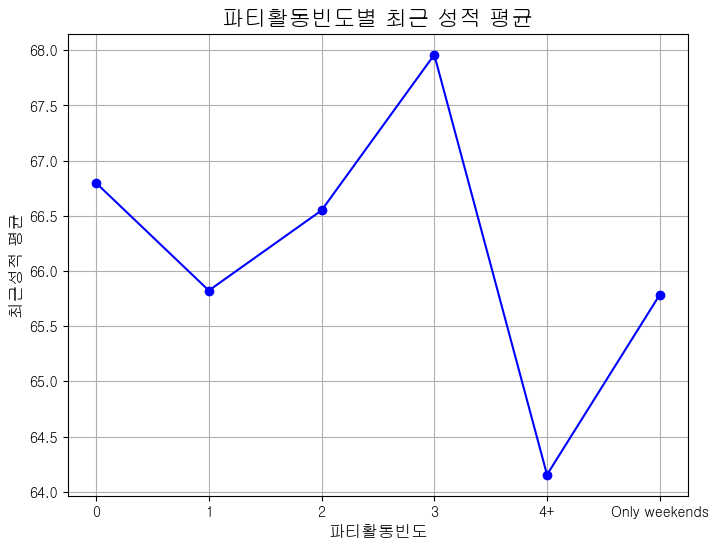

In [22]:
# 파티활동빈도
line_data = df.groupby('파티활동빈도')['최근성적'].mean()

plt.figure(figsize=(8, 6))
plt.plot(line_data.index, line_data.values, marker='o', linestyle='-', color='blue')
plt.title('파티활동빈도별 최근 성적 평균', fontsize=16)
plt.xlabel('파티활동빈도', fontsize=12)
plt.ylabel('최근성적 평균', fontsize=12)
plt.grid(True)
plt.show()

---


# 3) 음주와 학업의 관계 (음주량이 학업에 미치는 영향) 




##### 외출시 음주량별 낙제 횟수 비율
외출 시 음주량이 많을수록 낙제 횟수가 증가하는 것으로 나타났다.


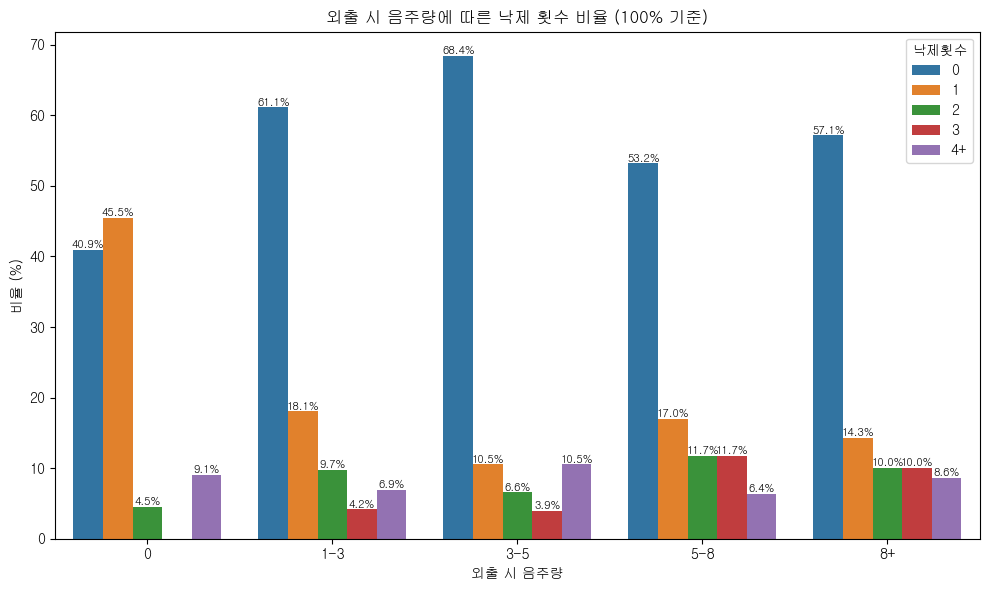

In [42]:
# Calculate counts for "외출시음주량" and "낙제횟수"
drink_failure_counts = df.groupby(['외출시음주량', '낙제횟수']).size().reset_index(name='count')

# Calculate the total counts for each "외출시음주량"
total_drink_counts = drink_failure_counts.groupby('외출시음주량')['count'].sum().reset_index(name='total')

# Merge the data and calculate percentages
drink_failure_counts = drink_failure_counts.merge(total_drink_counts, on='외출시음주량')
drink_failure_counts['percentage'] = (drink_failure_counts['count'] / drink_failure_counts['total']) * 100

# Define orders for the categories
drink_order = ['0', '1-3', '3-5', '5-8', '8+']
failure_order = ['0', '1', '2', '3', '4+']

# Create a bar chart for percentages
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=drink_failure_counts,
    x='외출시음주량',
    y='percentage',
    hue='낙제횟수',
    order=drink_order,
    hue_order=failure_order
)

# Add percentage labels on the bars
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f%%', label_type='edge',fontsize=8)

plt.title("외출 시 음주량에 따른 낙제 횟수 비율 (100% 기준)")
plt.xlabel("외출 시 음주량")
plt.ylabel("비율 (%)")
plt.legend(title='낙제횟수')
plt.tight_layout()
plt.show()


##### 낙제횟수별 최근 성적 평균
- **1학년 대상 - 낙제횟수별 고교 성적 대비 최근 성적 하락 비율**  
낙제횟수가 많을 수록, 최근 성적의 평균도 낮아지는 결과를 보였다.  
고등학교를 가장 최근에 졸업한 1학년을 대상으로 분석해보았을 때, 낙제 횟수가 많을 수록 고교 성적 대비 최근 성적 하락 비율도 큰 것으로 나타났다.



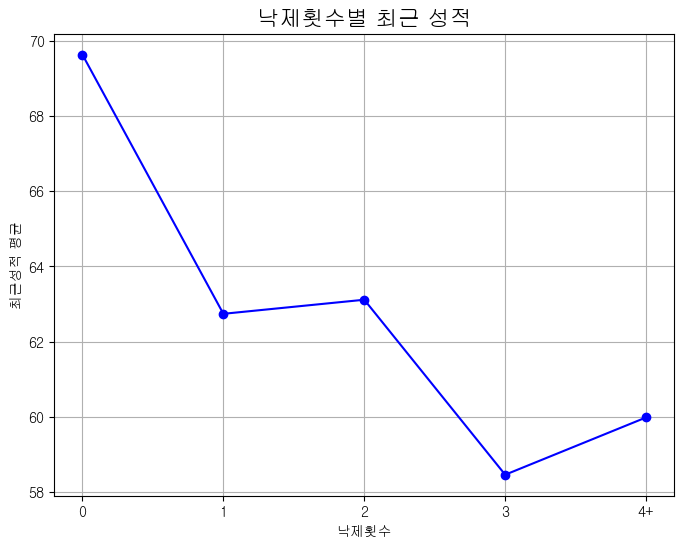

In [25]:
# 낙제횟수
line_data = df.groupby('낙제횟수')['최근성적'].mean()

plt.figure(figsize=(8, 6))
plt.plot(line_data.index, line_data.values, marker='o', linestyle='-', color='blue')
plt.title('낙제횟수별 최근 성적', fontsize=16)
plt.xlabel('낙제횟수')
plt.ylabel('최근성적 평균')
plt.grid(True)
plt.show()

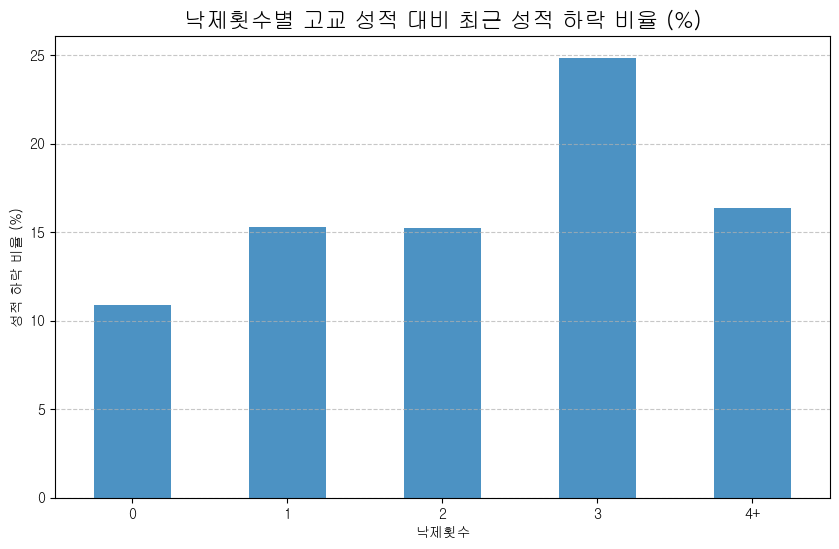

In [34]:
df_1st_year = df[df['학년'] == '1st Year']

# 낙제횟수 별 고교성적과 최근성적 평균 구하기
mean_scores = df_1st_year.groupby('낙제횟수')[['고교성적', '최근성적']].mean()

# 성적 차이 비율 계산
mean_scores['성적 차이 비율(%)'] = ((mean_scores['고교성적'] - mean_scores['최근성적']) / mean_scores['고교성적']) * 100


plt.figure(figsize=(10, 6))
mean_scores['성적 차이 비율(%)'].plot(kind='bar', alpha=0.8)
plt.title('낙제횟수별 고교 성적 대비 최근 성적 하락 비율 (%)', fontsize=16)
plt.xlabel('낙제횟수')
plt.ylabel('성적 하락 비율 (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
plt.show()


##### 외출시 음주량별 음주로 인한 결석수 비율
외출 시 음주량이 많을수록 음주로 인한 결석수가 증가하는 것으로 나타났다.


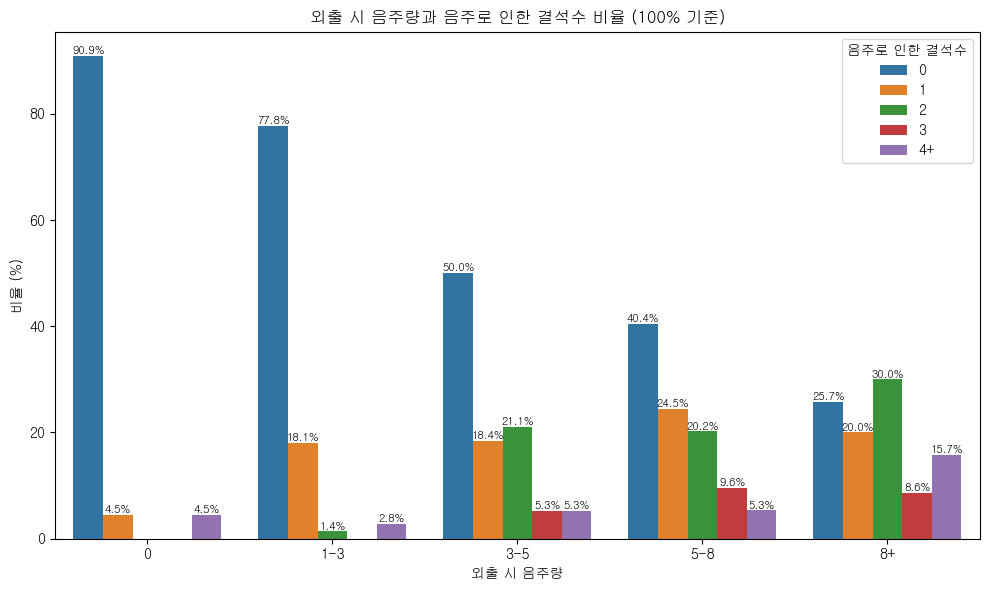

In [43]:

drink_absence_counts = df.groupby(['외출시음주량', '음주로인한결석수']).size().reset_index(name='count')


total_drink_counts = drink_absence_counts.groupby('외출시음주량')['count'].sum().reset_index(name='total')


drink_absence_counts = drink_absence_counts.merge(total_drink_counts, on='외출시음주량')
drink_absence_counts['percentage'] = (drink_absence_counts['count'] / drink_absence_counts['total']) * 100


drink_order = ['0', '1-3', '3-5', '5-8', '8+']
absence_order = ['0', '1', '2', '3', '4+']


plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=drink_absence_counts,
    x='외출시음주량',
    y='percentage',
    hue='음주로인한결석수',
    order=drink_order,
    hue_order=absence_order
)


for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f%%', label_type='edge',fontsize=8)

plt.title("외출 시 음주량과 음주로 인한 결석수 비율 (100% 기준)")
plt.xlabel("외출 시 음주량")
plt.ylabel("비율 (%)")
plt.legend(title='음주로 인한 결석수')
plt.tight_layout()
plt.show()

##### 음주로인한결석수별 최근 성적 평균
-  **1학년 대상- 음주로인한결석수별 고교 성적 대비 최근 성적 하락 비율**   
음주로인한 결석 횟수가 많을 수록, 최근 성적의 평균도 낮아지는 결과를 보였다.  
고등학교를 가장 최근에 졸업한 1학년을 대상으로 분석해보았을 때,  
음주로인한 결석 횟수가 많을 수록 고교 성적 대비 최근 성적 하락 비율도 큰 것으로 나타났다.

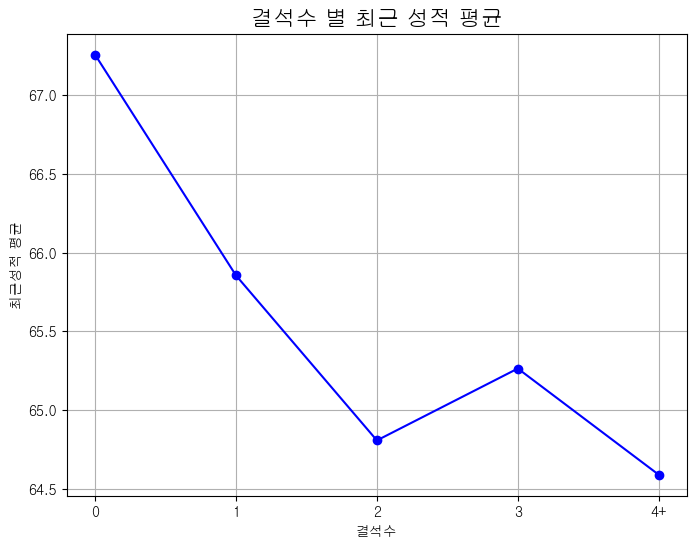

In [28]:
# 음주로인한결석수
line_data = df.groupby('음주로인한결석수')['최근성적'].mean()

plt.figure(figsize=(8, 6))
plt.plot(line_data.index, line_data.values, marker='o', linestyle='-', color='blue')
plt.title('결석수 별 최근 성적 평균', fontsize=16)
plt.xlabel('결석수')
plt.ylabel('최근성적 평균')
plt.grid(True)
plt.show()

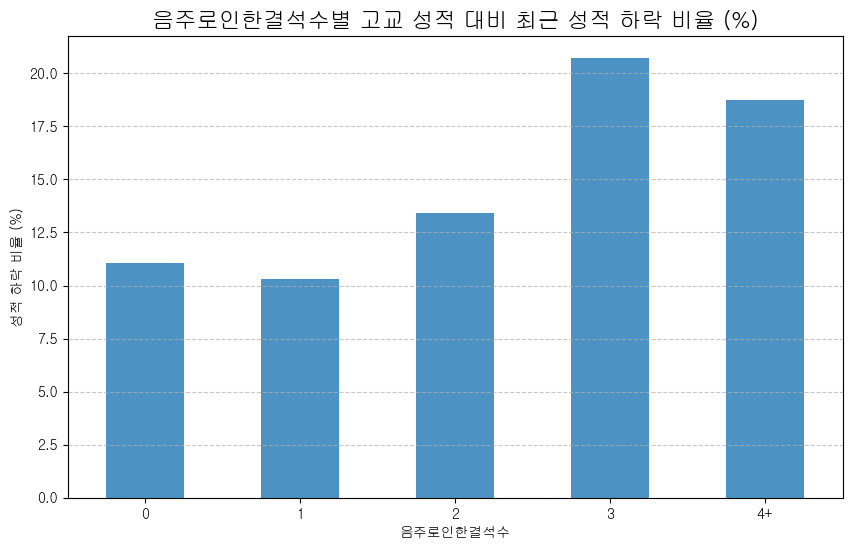

In [36]:
# 음주로인한결석수

df_1st_year = df[df['학년'] == '1st Year']

# 음주로인한결석수 별 고교성적과 최근성적 평균 구하기
mean_scores = df_1st_year.groupby('음주로인한결석수')[['고교성적', '최근성적']].mean()

# 성적 차이 비율 계산
mean_scores['성적 차이 비율(%)'] = ((mean_scores['고교성적'] - mean_scores['최근성적']) / mean_scores['고교성적']) * 100


plt.figure(figsize=(10, 6))
mean_scores['성적 차이 비율(%)'].plot(kind='bar', alpha=0.8)
plt.title('음주로인한결석수별 고교 성적 대비 최근 성적 하락 비율 (%)', fontsize=16)
plt.xlabel('음주로인한결석수')
plt.ylabel('성적 하락 비율 (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
plt.show()
